In [4]:
import pandas as pd 

In [6]:
df=pd.read_csv('electric_vehicles_spec_2025.csv.csv')
df.head()

,brand,model,top_speed_kmh,battery_capacity_kWh,battery_type,number_of_cells,torque_nm,efficiency_wh_per_km,range_km,acceleration_0_100_s,...,towing_capacity_kg,cargo_volume_l,seats,drivetrain,segment,length_mm,width_mm,height_mm,car_body_type,source_url
0,Abarth,500e Convertible,155,37.8,Lithium-ion,192.0,235.0,156,225,7.0,...,0.0,185,4,FWD,B - Compact,3673,1683,1518,Hatchback,https://ev-database.org/car/1904/Abarth-500e-C...
1,Abarth,500e Hatchback,155,37.8,Lithium-ion,192.0,235.0,149,225,7.0,...,0.0,185,4,FWD,B - Compact,3673,1683,1518,Hatchback,https://ev-database.org/car/1903/Abarth-500e-H...
2,Abarth,600e Scorpionissima,200,50.8,Lithium-ion,102.0,345.0,158,280,5.9,...,0.0,360,5,FWD,JB - Compact,4187,1779,1557,SUV,https://ev-database.org/car/3057/Abarth-600e-S...
3,Abarth,600e Turismo,200,50.8,Lithium-ion,102.0,345.0,158,280,6.2,...,0.0,360,5,FWD,JB - Compact,4187,1779,1557,SUV,https://ev-database.org/car/3056/Abarth-600e-T...
4,Aiways,U5,150,60.0,Lithium-ion,NaN,310.0,156,315,7.5,...,NaN,496,5,FWD,JC - Medium,4680,1865,1700,SUV,https://ev-database.org/car/1678/Aiways-U5


In [10]:
df['brand'].unique()

array(['Abarth', 'Aiways', 'Alfa', 'Alpine', 'Audi', 'BMW', 'BYD',
       'CUPRA', 'Cadillac', 'Citroen', 'DS', 'Dacia', 'Dongfeng',
       'Elaris', 'Fiat', 'Ford', 'GWM', 'Genesis', 'Honda', 'Hongqi',
       'Hyundai', 'Jaguar', 'Jeep', 'KGM', 'Kia', 'Lancia', 'Leapmotor',
       'Lexus', 'Lotus', 'Lucid', 'Lynk&Co', 'MG', 'Maserati', 'Maxus',
       'Mazda', 'Mercedes-Benz', 'Mini', 'NIO', 'Nissan', 'Omoda', 'Opel',
       'Peugeot', 'Polestar', 'Porsche', 'Renault', 'Rolls-Royce',
       'Skoda', 'Skywell', 'Smart', 'Subaru', 'Tesla', 'Toyota',
       'VinFast', 'Volkswagen', 'Volvo', 'Voyah', 'XPENG', 'Zeekr',
       'firefly'], dtype=object)

In [14]:
df['car_body_type'].unique()

array(['Hatchback', 'SUV', 'Station/Estate', 'Liftback Sedan', 'Sedan',
       'Small Passenger Van', 'Cabriolet', 'Coupe'], dtype=object)

In [33]:
df[['seats', 'segment', 'car_body_type']].sample()

,seats,segment,car_body_type
401,5,F - Luxury,Liftback Sedan


In [38]:
df.info ()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478 entries, 0 to 477
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   brand                      478 non-null    object 
 1   model                      477 non-null    object 
 2   top_speed_kmh              478 non-null    int64  
 3   battery_capacity_kWh       478 non-null    float64
 4   battery_type               478 non-null    object 
 5   number_of_cells            276 non-null    float64
 6   torque_nm                  471 non-null    float64
 7   efficiency_wh_per_km       478 non-null    int64  
 8   range_km                   478 non-null    int64  
 9   acceleration_0_100_s       478 non-null    float64
 10  fast_charging_power_kw_dc  477 non-null    float64
 11  fast_charge_port           477 non-null    object 
 12  towing_capacity_kg         452 non-null    float64
 13  cargo_volume_l             477 non-null    object 

In [41]:
df.isnull().mean()*100

brand                         0.000000
model                         0.209205
top_speed_kmh                 0.000000
battery_capacity_kWh          0.000000
battery_type                  0.000000
number_of_cells              33.054393
torque_nm                     1.464435
efficiency_wh_per_km          0.000000
range_km                      0.000000
acceleration_0_100_s          0.000000
fast_charging_power_kw_dc     0.209205
fast_charge_port              0.209205
towing_capacity_kg            5.439331
cargo_volume_l                0.209205
seats                         0.000000
drivetrain                    0.000000
segment                       0.000000
length_mm                     0.000000
width_mm                      0.000000
height_mm                     0.000000
car_body_type                 0.000000
source_url                    0.000000
dtype: float64

In [44]:
df.drop('number_of_cells', axis=1 , inplace=True)

In [49]:
df['torque_nm'].fillna(df['torque_nm'].mean(), inplace=True)

In [50]:
df['torque_nm'].isnull().mean()*100

0.0

# EDA

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns

In [53]:
sns.set(style='whitegrid')
plt.rcParams['figure.figsize']=(10,5)

In [57]:
numeric_cols = [
    "battery_capacity_kWh", "range_km", "top_speed_kmh",
    "torque_nm", "efficiency_wh_per_km", "acceleration_0_100_s"
]

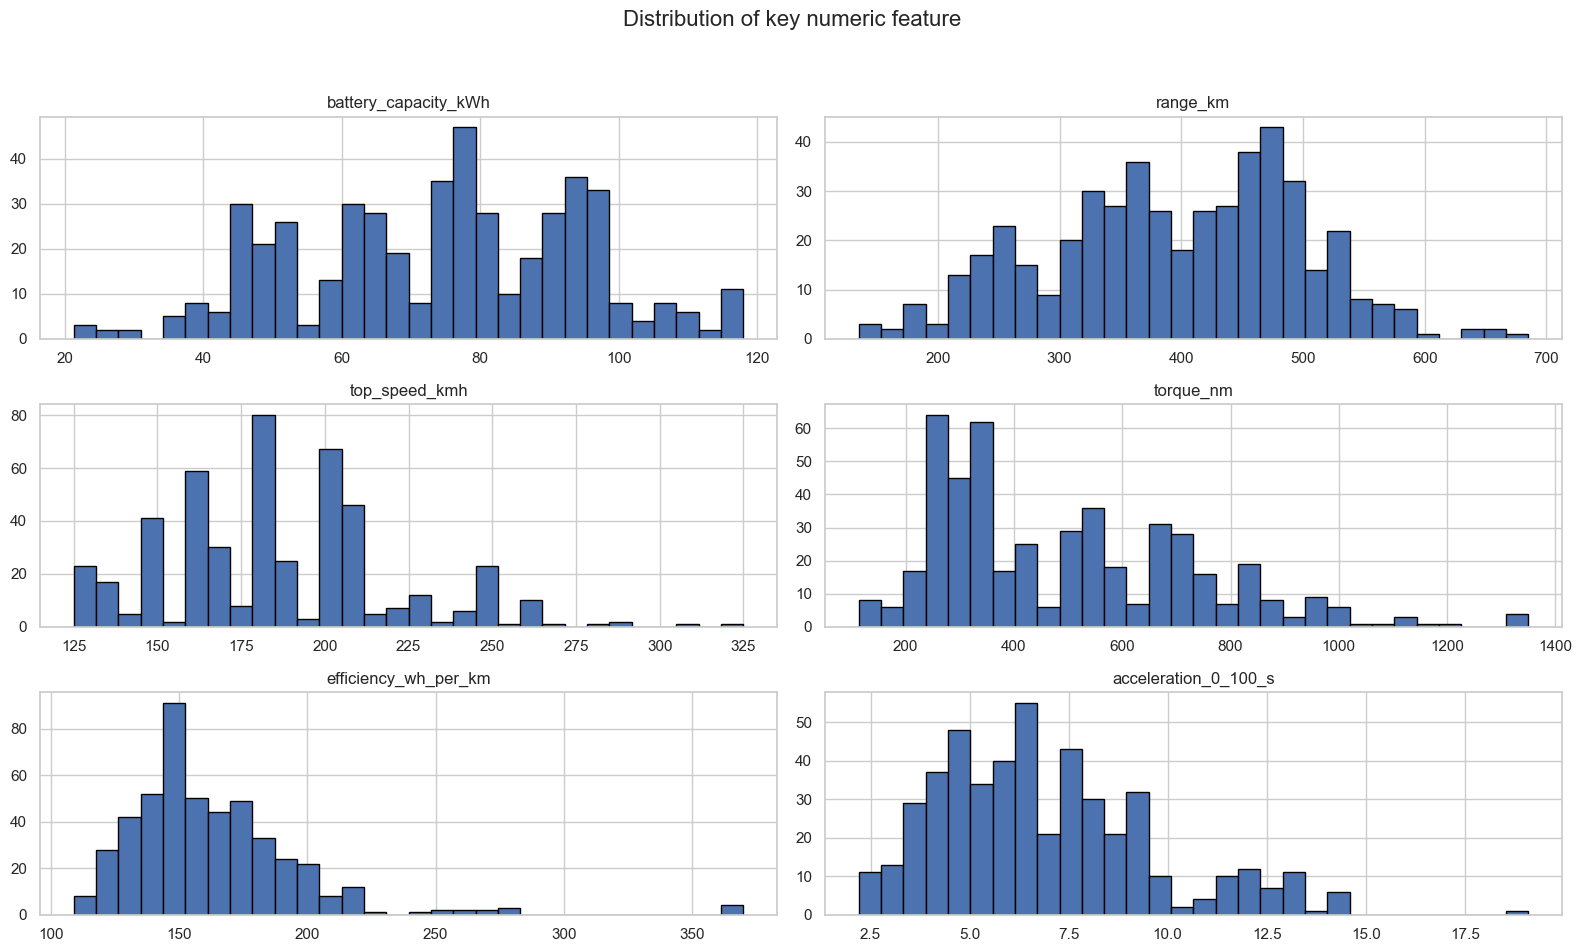

In [58]:
df[numeric_cols].hist(bins=30, figsize=(16, 10), layout=(3, 2), color="#4C72B0", edgecolor="black")
plt.suptitle("Distribution of key numeric feature", fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

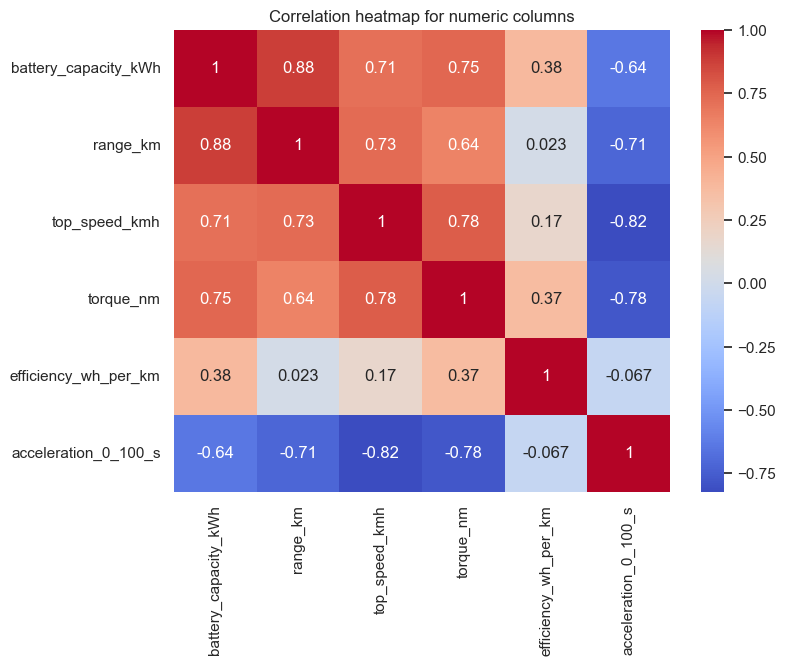

In [63]:
corr_matrix=df[numeric_cols].corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation heatmap for numeric columns")
plt.show()

In [65]:
top_brands = df['brand'].value_counts().head(10)
top_brands

brand
Mercedes-Benz    42
Audi             28
Porsche          26
Volkswagen       23
Ford             22
BMW              20
Peugeot          19
Volvo            18
BYD              17
Smart            17
Name: count, dtype: int64

C:\Users\HP\AppData\Local\Temp\ipykernel_10672\3219359621.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_brands.index, y=top_brands.values, palette="viridis")


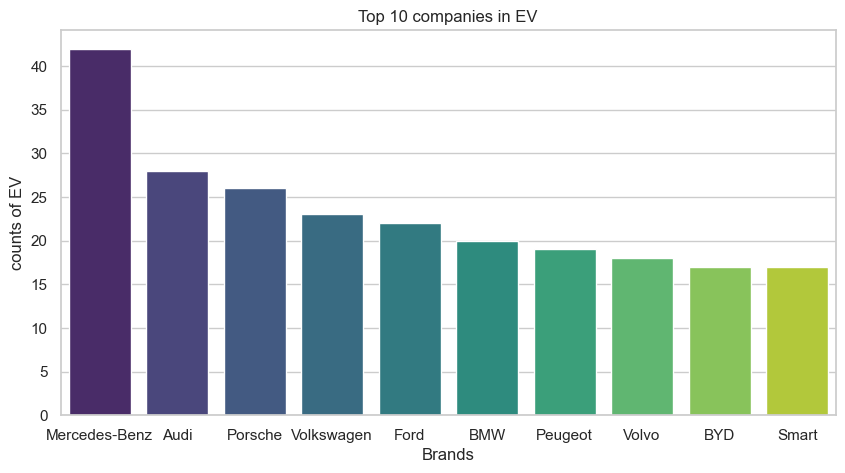

In [76]:
sns.barplot(x=top_brands.index, y=top_brands.values, palette="viridis")
plt.title("Top 10 companies in EV")
plt.xlabel("Brands")
plt.ylabel("counts of EV")
plt.show()

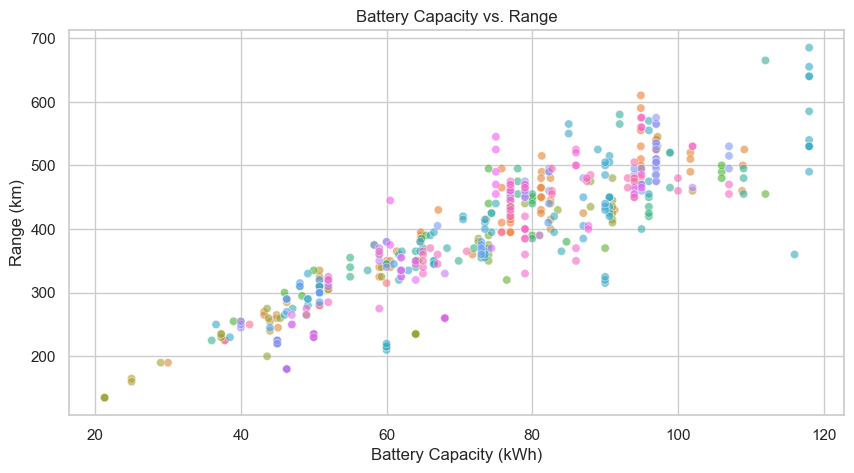

In [80]:
sns.scatterplot(data=df, x="battery_capacity_kWh", y="range_km", hue="brand", legend=False, alpha=0.6)
plt.title("Battery Capacity vs. Range")
plt.xlabel("Battery Capacity (kWh)")
plt.ylabel("Range (km)")
plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_10672\2908567633.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=segment_range.values, y=segment_range.index, palette='rocket')


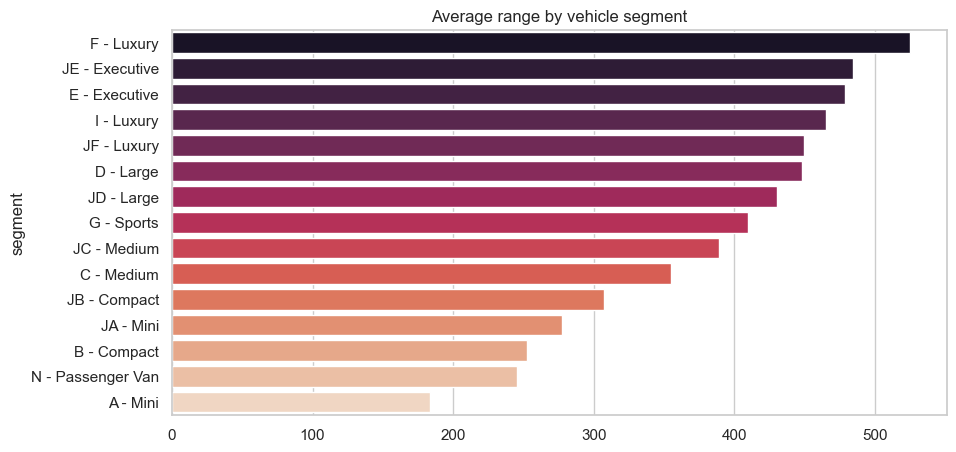

In [81]:
segment_range= df.groupby('segment')['range_km'].mean().sort_values(ascending=False)
sns.barplot(x=segment_range.values, y=segment_range.index, palette='rocket')
plt.title("Average range by vehicle segment")
plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_10672\915277593.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=eff_by_body.values, y=eff_by_body.index, palette='mako')


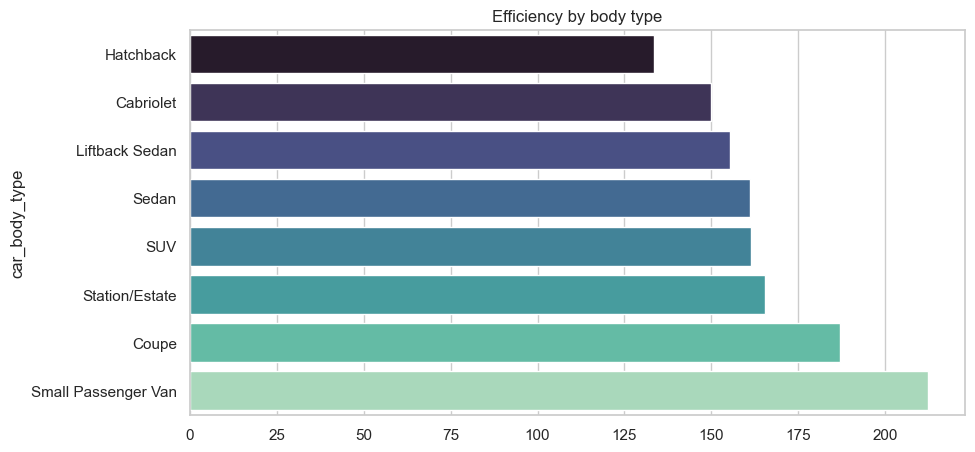

In [85]:
eff_by_body=df.groupby("car_body_type")["efficiency_wh_per_km"].mean().sort_values()
sns.barplot(x=eff_by_body.values, y=eff_by_body.index, palette='mako')
plt.title("Efficiency by body type")
plt.show()

# Predictive modeling

In [86]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score


In [90]:
model_df = df[[
    'range_km', 'battery_capacity_kWh', 'efficiency_wh_per_km', 
    'acceleration_0_100_s', 'torque_nm', 'top_speed_kmh'
]]

In [91]:
X = model_df.drop('range_km', axis=1)
y = model_df['range_km']

In [100]:
x_train,x_test,y_train,y_test=train_test_split(X,y, test_size=0.2,random_state=50)
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [101]:
y_pred = lr.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [102]:
print("Mean Squrared Error=",mse)
print("R2 Score=",r2)

Mean Squrared Error= 606.9004444115948
R2 Score= 0.9380783592531771


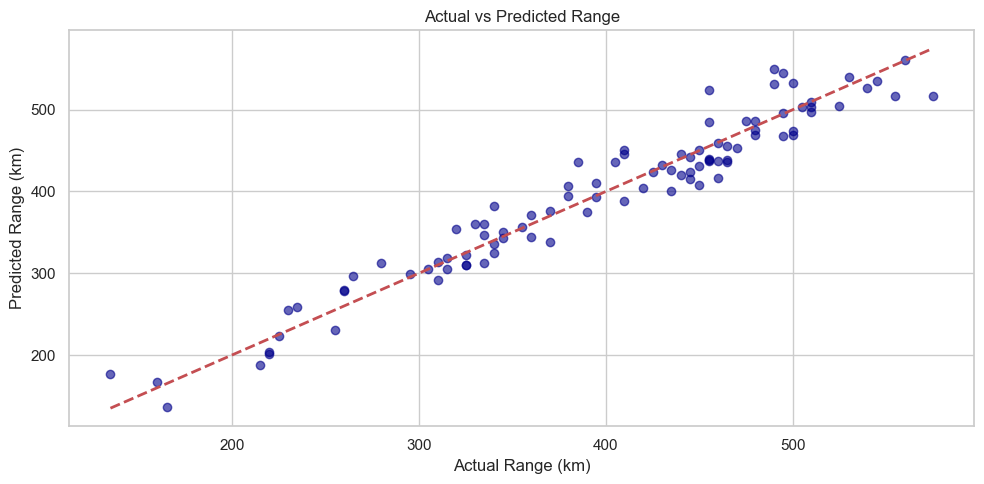

In [110]:
plt.scatter(y_test,y_pred, alpha=0.6, color='darkblue')
plt.plot([y_test.min(),y_test.max()],[y_test.min(),y_test.max()], '--r', lw=2)
plt.title("Actual vs Predicted Range")
plt.xlabel("Actual Range (km)")
plt.ylabel("Predicted Range (km)")
plt.grid(True)
plt.tight_layout()
plt.show()

In [112]:
predictions_df = x_test.copy()
predictions_df['Actual_Range'] = y_test
predictions_df['Predicted_Range'] = y_pred
predictions_df.to_csv("range_predictions_improved.csv", index=False)


In [113]:
from sklearn.ensemble import RandomForestRegressor 

In [122]:
rf=RandomForestRegressor(n_estimators=100, random_state=45)
rf.fit(x_train,y_train)
rf_pred=rf.predict(x_test)

In [123]:
print("Mean Squared Error= ",mean_squared_error(y_test,rf_pred))
print("R2 Score= ",r2_score(y_test,rf_pred))

Mean Squared Error=  422.2921461978446
R2 Score=  0.9569138187196091


In [125]:
x_train.columns

Index(['battery_capacity_kWh', 'efficiency_wh_per_km', 'acceleration_0_100_s',
       'torque_nm', 'top_speed_kmh'],
      dtype='object')

In [126]:
importance =rf.feature_importances_
features=x_train.columns

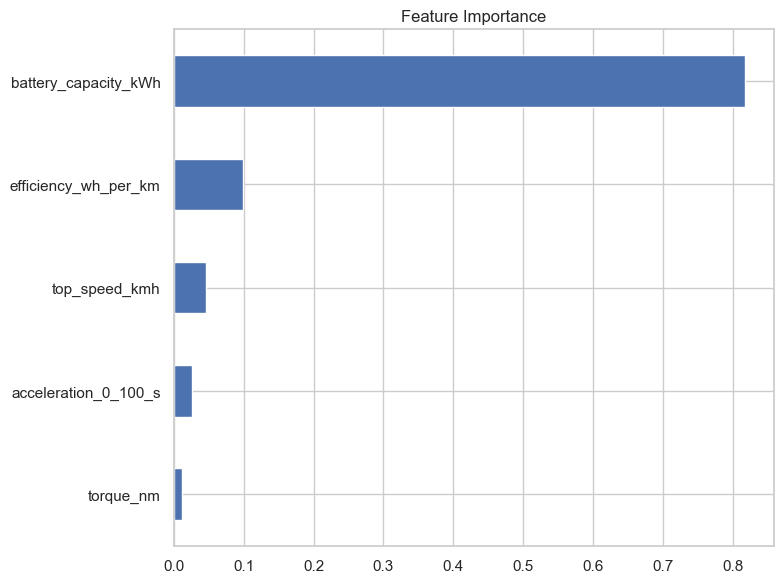

In [130]:
pd.Series(importance,index=features).sort_values().plot(kind='barh', figsize=(8,6))
plt.title("Feature Importance")
plt.tight_layout()
plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_10672\3035924221.py:2: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "--r" (-> color='r'). The keyword argument will take precedence.
  plt.plot([y_test.min(),y_test.max()],[y_test.min(),y_test.max()], '--r', lw=2, color='blue')


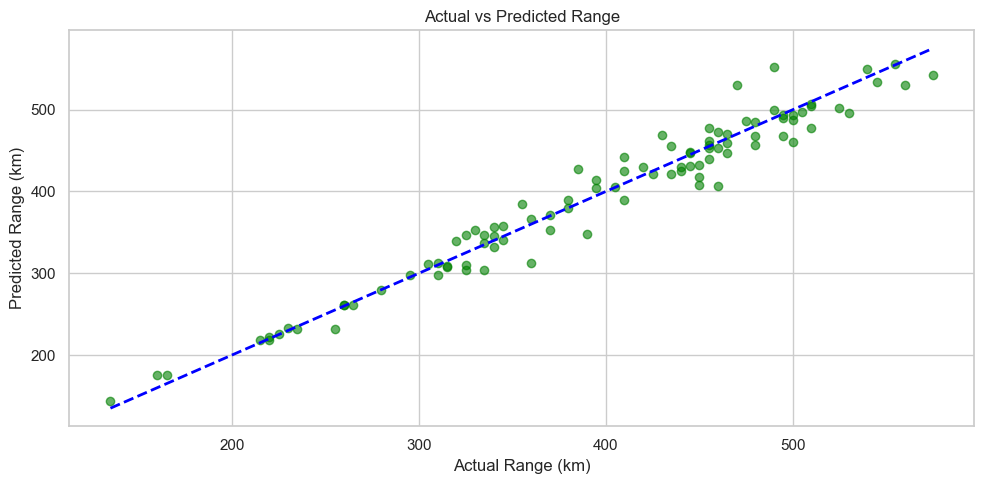

In [134]:
plt.scatter(y_test,rf_pred, alpha=0.6, color='green')
plt.plot([y_test.min(),y_test.max()],[y_test.min(),y_test.max()], '--r', lw=2, color='blue')
plt.title("Actual vs Predicted Range")
plt.xlabel("Actual Range (km)")
plt.ylabel("Predicted Range (km)")
plt.grid(True)
plt.tight_layout()
plt.show()